In [18]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
labels = os.listdir('../NewDataset/train')

In [20]:
labels

['closed_eyes', 'no_yawn', 'open_eyes', 'yawn']

In [21]:
def face_for_yawn():
    yawn_data = []
    IMAGE_SIZE = 145
    yawn_labels = ["yawn", "no_yawn"]

    for yawn_label in yawn_labels:
        path_link = os.path.join("../NewDataset/train", yawn_label)
        class_num_yawn = yawn_labels.index(yawn_label)
        print(class_num_yawn)

        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMAGE_SIZE, IMAGE_SIZE))
                yawn_data.append([resized_array, class_num_yawn])

    return yawn_data

In [22]:
def face_for_eyes():
    eye_data = []
    IMAGE_SIZE = 145
    eye_labels = ['closed_eyes', 'open_eyes']

    for eye_label in eye_labels:
        path = os.path.join("../NewDataset/train", eye_label)
        class_num_eye = eye_labels.index(eye_label)
        class_num_eye +=2
        print(class_num_eye)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                eye_data.append([resized_array, class_num_eye])

            except Exception as e:
                print(e)

    return eye_data

In [23]:
def append_data():
    yawn_no_yawn = face_for_yawn()
    eye_open_closed = face_for_eyes()
    yawn_no_yawn.extend(eye_open_closed)
    return np.array(yawn_no_yawn, dtype=object)

In [24]:
label_data = append_data()

0
1
2
3


In [25]:
X = []
y = []
for features, label in label_data:
    X.append(features)
    y.append(label)

In [26]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [27]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [28]:
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, test_size = test_size)

In [30]:
len(X_test)

578

In [31]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2, horizontal_flip = True, rotation_range = 30)
test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle = False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle = False)

In [33]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [34]:
history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = test_generator,
    shuffle = True,
    validation_steps = len(test_generator)
)

Epoch 1/50
43/43 [==============================] - 8s 174ms/step - loss: 1.2847 - accuracy: 0.4298 - val_loss: 1.1452 - val_accuracy: 0.5415
Epoch 2/50
43/43 [==============================] - 7s 167ms/step - loss: 0.6637 - accuracy: 0.7350 - val_loss: 0.4428 - val_accuracy: 0.8131
Epoch 3/50
43/43 [==============================] - 7s 167ms/step - loss: 0.4339 - accuracy: 0.8278 - val_loss: 0.3131 - val_accuracy: 0.8858
Epoch 4/50
43/43 [==============================] - 7s 167ms/step - loss: 0.3537 - accuracy: 0.8411 - val_loss: 0.3012 - val_accuracy: 0.8824
Epoch 5/50
43/43 [==============================] - 7s 167ms/step - loss: 0.3270 - accuracy: 0.8671 - val_loss: 0.2678 - val_accuracy: 0.8979
Epoch 6/50
43/43 [==============================] - 7s 166ms/step - loss: 0.2873 - accuracy: 0.8834 - val_loss: 0.2499 - val_accuracy: 0.8841
Epoch 7/50
43/43 [==============================] - 7s 167ms/step - loss: 0.2845 - accuracy: 0.8708 - val_loss: 0.2384 - val_accuracy: 0.9031
Epoch 

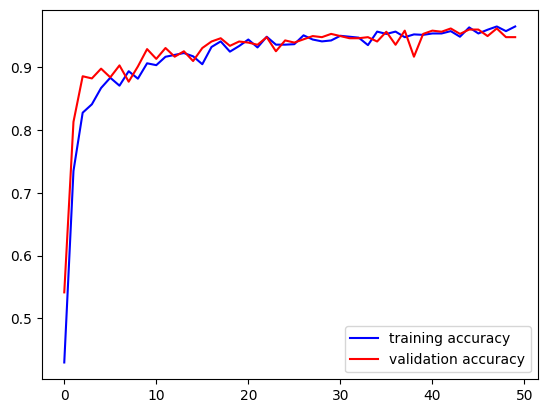

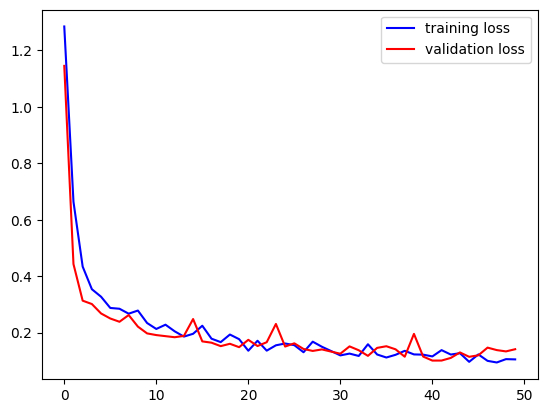

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label = "training accuracy")
plt.plot(epochs, val_accuracy, "r", label = "validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label = "training loss")
plt.plot(epochs, val_loss, "r", label = "validation loss")
plt.legend()
plt.show()

In [36]:
model.save("safedrivemodel3.h5")

In [37]:
model.save("safedrivemodel3.model")

INFO:tensorflow:Assets written to: safedrivemodel3.model\assets


INFO:tensorflow:Assets written to: safedrivemodel3.model\assets


In [38]:
prediction = model.predict(X_test)

19/19 [==============================] - 1s 39ms/step


In [39]:
labels_new = ["yawn", "no_yawn", "closed_eyes", "open_eyes"]

In [40]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis = 1), prediction.argmax(axis = 1), target_names = labels_new))

              precision    recall  f1-score   support

        yawn       0.90      0.70      0.79        63
     no_yawn       0.80      0.93      0.86        74
 closed_eyes       0.95      0.94      0.95       215
   open_eyes       0.94      0.96      0.95       226

    accuracy                           0.92       578
   macro avg       0.90      0.88      0.89       578
weighted avg       0.92      0.92      0.92       578

